### Assigment 2 - Antoni Karpinski, Polina Brazhko, Jakub Osek

In [15]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# df - the whole dataset

#filepaths = [f for f in os.listdir("./DataExpo2009/") if f.endswith('.csv')]
#filepaths = ["./DataExpo2009/" + s for s in filepaths]
#li = []
#for path in filepaths:
#    df = pd.read_csv(path, encoding='ISO-8859-1', low_memory=False)
#    li.append(df)
#df = pd.concat(li, axis=0, ignore_index=True)

In [108]:
df = pd.read_csv("./DataExpo2009/2001.csv", encoding='ISO-8859-1', low_memory=False)

In [109]:
# Give a unique row number as "Id".
df.index.name="Id"
df.reset_index()
def mapping_eleven(day, cancelled):
    if day == 11 and cancelled == 1:
        return 1
    else:
        return 0
def mapping_not_eleven(day, cancelled):
    if day != 11 and cancelled == 1:
        return 0
    else:
        return 1
df['CancelledEleven'] = df.apply(lambda row: mapping_eleven(row.DayofMonth, row.Cancelled), axis=1)
df['CancelledNotEleven'] = df.apply(lambda row: mapping_not_eleven(row.DayofMonth, row.Cancelled), axis=1)
func = dict(CancelledEleven = 'sum', CancelledNotEleven = 'sum')
df = df.groupby(['Month']).agg(func).reset_index()
df

Month  CancelledEleven  CancelledNotEleven
0       1              712              510761
1       2              374              460750
2       3              254              513497
3       4             1550              504323
4       5              287              520775
5       6              463              505184
6       7              397              527551
7       8              525              531558
8       9            14962              406336
9      10              372              437318
10     11               62              412951
11     12              139              425675

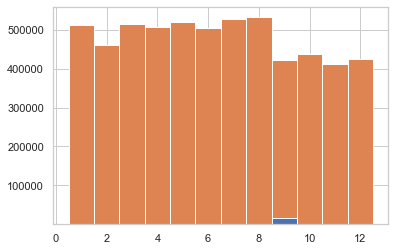

In [110]:
fig, ax = plt.subplots()

ax.bar(df["Month"], df["CancelledEleven"], 1, 1, label='CancelledEleven')
ax.bar(df["Month"], df["CancelledNotEleven"], 1, label='CancelledNotEleven', bottom=df["CancelledEleven"])
plt.show()

sns.set_theme(style="whitegrid")
#df2.set_index("Month")
#axes[0].plot(sns.barplot(data = df2, x = 'Month', y = 'CancelledEleven', palette = sns.color_palette('hls', 1)))

In [111]:
df2 = pd.read_csv("./DataExpo2009/2000.csv", encoding='ISO-8859-1', low_memory=False)
df2

Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0        2000      1          28          5   1647.0        1647   1906.0   
1        2000      1          29          6   1648.0        1647   1939.0   
2        2000      1          30          7      NaN        1647      NaN   
3        2000      1          31          1   1645.0        1647   1852.0   
4        2000      1           1          6    842.0         846   1057.0   
...       ...    ...         ...        ...      ...         ...      ...   
5683042  2000     12           9          6    615.0         613    941.0   
5683043  2000     12          10          7    619.0         613    925.0   
5683044  2000     12          11          1    611.0         613    949.0   
5683045  2000     12          12          2    613.0         613   1005.0   
5683046  2000     12          13          3    614.0         613    948.0   

         CRSArrTime UniqueCarrier  FlightNum  ... TaxiIn  TaxiOut  Cancelled  \
0              1859            HP        154  ...     15       11          0   
1              1859            HP        154  ...      5       47          0   
2              1859            HP        154  ...      0        0          1   
3              1859            HP        154  ...      7       14          0   
4              1101            HP        609  ...      3        8          0   
...             ...           ...        ...  ...    ...      ...        ...   
5683042         945            AA        705  ...     11       18          0   
5683043         945            AA        705  ...      8       15          0   
5683044         945            AA        705  ...      8       12          0   
5683045         945            AA        705  ...      9       18          0   
5683046         945            AA        705  ...     12       23          0   

         CancellationCode  Diverted  CarrierDelay WeatherDelay NASDelay  \
0                     NaN         0           NaN          NaN      NaN   
1                     NaN         0           NaN          NaN      NaN   
2                     NaN         0           NaN          NaN      NaN   
3                     NaN         0           NaN          NaN      NaN   
4                     NaN         0           NaN          NaN      NaN   
...                   ...       ...           ...          ...      ...   
5683042               NaN         0           NaN          NaN      NaN   
5683043               NaN         0           NaN          NaN      NaN   
5683044               NaN         0           NaN          NaN      NaN   
5683045               NaN         0           NaN          NaN      NaN   
5683046               NaN         0           NaN          NaN      NaN   

         SecurityDelay  LateAircraftDelay  
0                  NaN                NaN  
1                  NaN                NaN  
2                  NaN                NaN  
3                  NaN                NaN  
4                  NaN                NaN  
...                ...                ...  
5683042            NaN                NaN  
5683043            NaN                NaN  
5683044            NaN                NaN  
5683045            NaN                NaN  
5683046            NaN                NaN  

[5683047 rows x 29 columns]

<AxesSubplot:xlabel='CategoryDistance', ylabel='Count'>

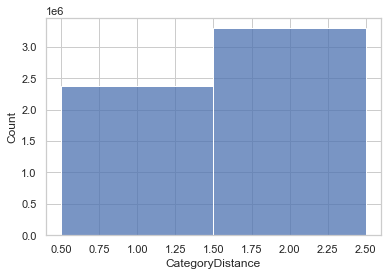

In [112]:
#sns.histplot(data = df, x="CarrierDelay")
df2["CategoryDistance"] = pd.cut(df2["Distance"], bins = [-np.inf, 500, np.inf], labels =[1, 2])
sns.histplot(data = df2, x = "CategoryDistance")

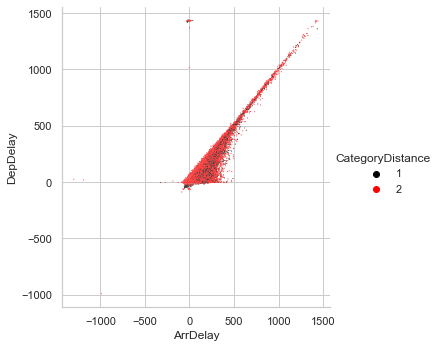

In [113]:
# Remove outliers
#df2 = df.head(100000)
sns.relplot(data = df2, x = "ArrDelay", y = "DepDelay", s=1, hue="CategoryDistance", palette=["black", "red"])

In [ ]:
# Interpretation:
# There is a clear linear correlation. It is also possible that deperature delay is lower than arriival dealy but no the other way around. There is no correlation with the distance.